#**Restaurant Food Cost**

---

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

#**IMporting Required Libraries**

In [136]:
# Importing necessary libraries >>

# For dealing with Dataframe >>
import pandas as pd
# For Dealing with Calculations >>
import numpy as np
# For dealing with Graphs >>
import matplotlib.pyplot as plt
import seaborn as sns

#**Load the Data**

In [137]:
# Load the dataset into df variable >>
train_df = pd.read_excel('./Data_Train.xlsx')
test_df = pd.read_excel('./Data_Test.xlsx')

# Exlclude ID Column not required >>
train_df.drop(['RESTAURANT_ID'],axis=1,inplace=True)
test_df.drop(['RESTAURANT_ID'],axis=1,inplace=True)

#**Explore the Data**

In [138]:
# Make all columns & rows of dataset as max to display >>
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Lets look at top  Rows of Dataset >>
train_df.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [139]:
# Lets look at top  Rows of Dataset >>
test_df.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [140]:
# Check the Shape of train Dataset >>
print("-"*70)
print("[$] Rows Of Dataset >> ",train_df.shape[0])
print("[$] Columns Of Dataset >> ",train_df.shape[1])
print("-"*70)

# Check the Shape of test Dataset >>
print("[$] Rows Of Dataset >> ",test_df.shape[0])
print("[$] Columns Of Dataset >> ",test_df.shape[1])
print("-"*70)

----------------------------------------------------------------------
[$] Rows Of Dataset >>  12690
[$] Columns Of Dataset >>  8
----------------------------------------------------------------------
[$] Rows Of Dataset >>  4231
[$] Columns Of Dataset >>  7
----------------------------------------------------------------------


In [141]:
# Information of Dataset >> to get information about Columns & thier datatypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TITLE     12690 non-null  object
 1   CUISINES  12690 non-null  object
 2   TIME      12690 non-null  object
 3   CITY      12578 non-null  object
 4   LOCALITY  12592 non-null  object
 5   RATING    12688 non-null  object
 6   VOTES     11486 non-null  object
 7   COST      12690 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 793.2+ KB


In [142]:
# Check for missin values or Null values >>
print("[$] Null Values >> ",train_df.isnull().sum().sum())
train_df.isnull().sum()

[$] Null Values >>  1416


TITLE          0
CUISINES       0
TIME           0
CITY         112
LOCALITY      98
RATING         2
VOTES       1204
COST           0
dtype: int64

In [143]:
Categorical_columns = train_df.select_dtypes(include=['object']).columns
Numerical_Columns = train_df.select_dtypes(include=['int64']).columns

print("[$] Categorical Columns >> ",Categorical_columns.tolist())
print("[$] Numerical Columns >> ",Numerical_Columns.tolist())

[$] Categorical Columns >>  ['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES']
[$] Numerical Columns >>  ['COST']


#**Exploratory Data Analysis**

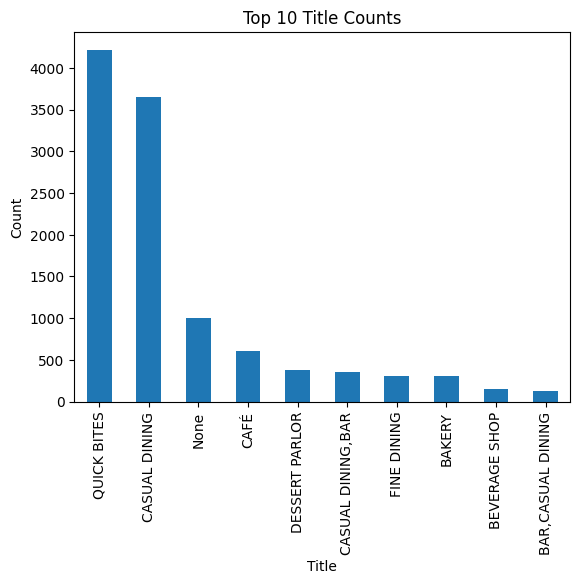

In [144]:
train_df['TITLE'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Top 10 Title Counts')
plt.show()

# >> We can see we have more no of restaurant names QUICK BITES 4000 followed by CASUAL DINNING 35000 & rest others have small no of counts
# >> We can make Other Resturant names as Other Category

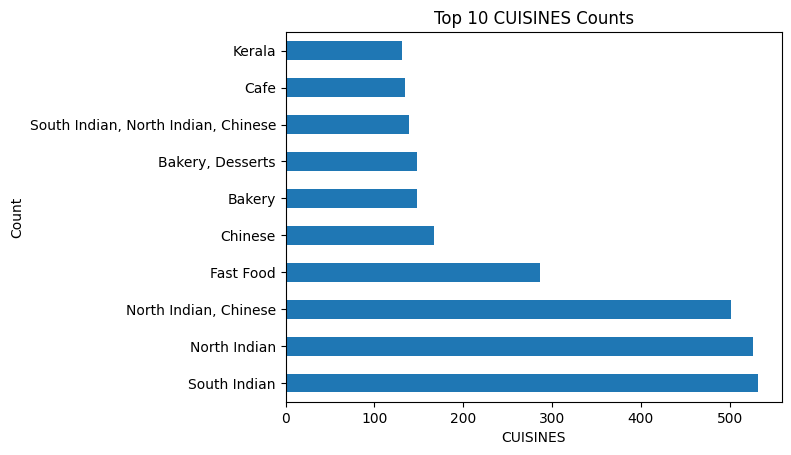

In [145]:
train_df['CUISINES'].value_counts().head(10).plot(kind='barh')
plt.xlabel('CUISINES')
plt.ylabel('Count')
plt.title('Top 10 CUISINES Counts')
plt.show()

# >> We can see we have max CUISINES dish as South Indian followed by North Indian then Chinese & fastfood so on
# >> We can make Other CUISINES dish as Other Category

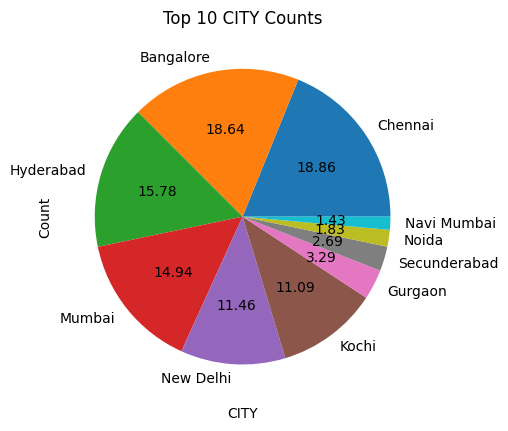

In [146]:
train_df['CITY'].value_counts().head(10).plot(kind='pie',autopct='%.2f')
plt.xlabel('CITY')
plt.ylabel('Count')
plt.title('Top 10 CITY Counts')
plt.show()

# >> We have Chennai at top for resturants & then Banglore followed by Hydrabad so on
# >> We can make Other City names as Other Category City

In [147]:
# >>> Time & Locality are not so much important factor as we have considered City & we dont have perfect time in dataset so drop them >>
train_df.drop(['TIME','LOCALITY'],axis=1,inplace=True)
test_df.drop(['TIME','LOCALITY'],axis=1,inplace=True)

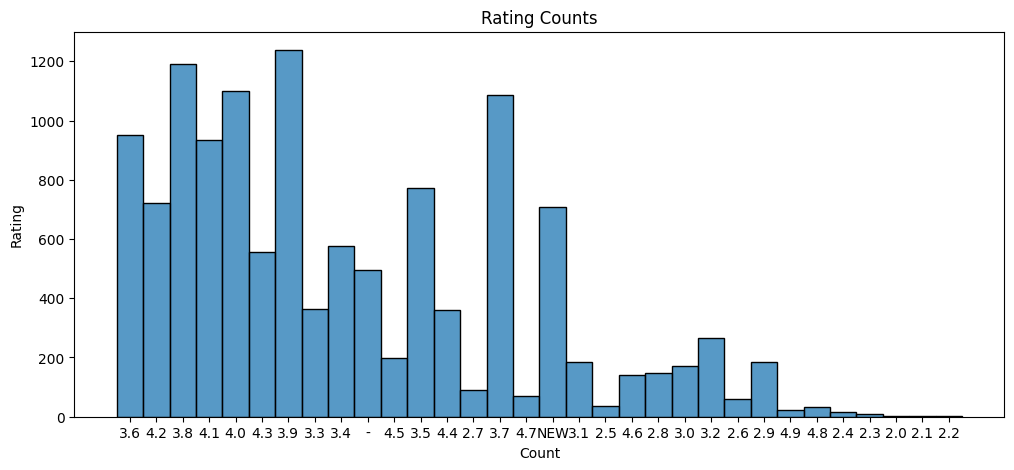

In [148]:
plt.figure(figsize=(12,5))
sns.histplot(train_df['RATING'])
plt.xlabel('Count')
plt.ylabel('Rating')
plt.title('Rating Counts')
plt.show()

# >>>> As we can see we have some - & New as String values in rating so we need to replace them by 0 >>

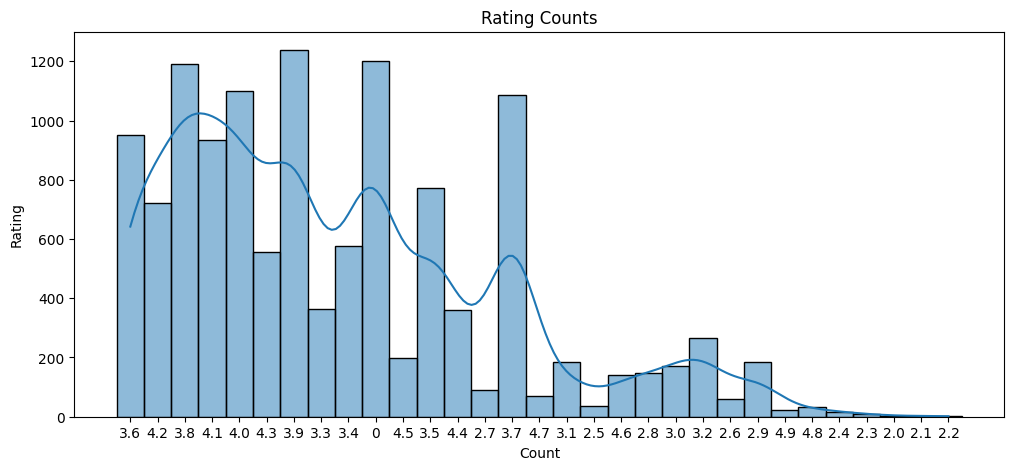

In [149]:
train_df['RATING'] = train_df['RATING'].replace({'-': '0', 'NEW': '0'})
test_df['RATING'] = test_df['RATING'].replace({'-': '0', 'NEW': '0'})

plt.figure(figsize=(12,5))
sns.histplot(train_df['RATING'],kde=True)
plt.xlabel('Count')
plt.ylabel('Rating')
plt.title('Rating Counts')
plt.show()

# >>>> As we can see we have replaced that New & - with Rating as 0

In [150]:
# Convert 'RATING' column to numeric
train_df['RATING'] = pd.to_numeric(train_df['RATING'], errors='coerce')
test_df['RATING'] = pd.to_numeric(test_df['RATING'], errors='coerce')

In [151]:
# >>> Now in Votes Column we are going to replace votes keyword so that we can get only numeric data >>
train_df['VOTES'] = train_df['VOTES'].str.strip().str.replace('votes', '')
test_df['VOTES'] = test_df['VOTES'].str.strip().str.replace('votes', '')

In [152]:
train_df.head()

,TITLE,CUISINES,CITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,3.6,49,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,4.2,30,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,3.8,221,800
3,QUICK BITES,"Tibetan, Chinese",Mumbai,4.1,24,800
4,DESSERT PARLOR,Desserts,Mumbai,3.8,165,300


In [153]:
# Convert 'VOTES' column to numeric
train_df['VOTES'] = pd.to_numeric(train_df['VOTES'], errors='coerce')

# Define the bins and labels for categorization
bins = [-1, 1000, 3000, np.inf]
labels = ['Good', 'Better', 'Best']

# Map the values into categories
train_df['VOTES_Category'] = pd.cut(train_df['VOTES'], bins=bins, labels=labels, right=False)

In [154]:
# Convert 'VOTES' column to numeric
test_df['VOTES'] = pd.to_numeric(test_df['VOTES'], errors='coerce')

# Define the bins and labels for categorization
bins = [-1, 1000, 3000, np.inf]
labels = ['Good', 'Better', 'Best']

# Map the values into categories
test_df['VOTES_Category'] = pd.cut(test_df['VOTES'], bins=bins, labels=labels, right=False)

In [155]:
# >> Remove votes Column >>
train_df.drop(['VOTES'],axis=1,inplace=True)
test_df.drop(['VOTES'],axis=1,inplace=True)

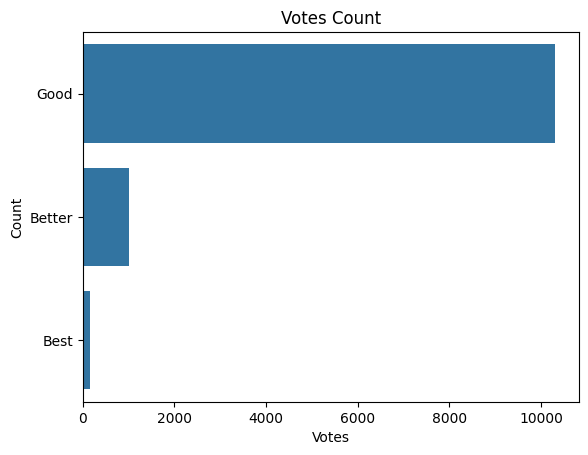

In [156]:
sns.countplot(train_df['VOTES_Category'])
plt.xlabel('Votes')
plt.ylabel('Count')
plt.title('Votes Count')
plt.show()

# >> We can see we have max votes are between 0-100 as max count for Good then Better Votes & last for Best as there some few Restaurants who has Best Votes >>

#**Data Preprocessing**

In [157]:
# >> Check for null values >>
train_df.isnull().sum()

TITLE                0
CUISINES             0
CITY               112
RATING               2
COST                 0
VOTES_Category    1204
dtype: int64

In [158]:
# Impute missing values in 'CITY' column with mode
train_df['CITY'].fillna(train_df['CITY'].mode()[0], inplace=True)

# Impute missing values in 'RATING' column with mode
train_df['RATING'].fillna(train_df['RATING'].mean, inplace=True)

# Impute missing values in 'VOTES_Category' column with mode
train_df['VOTES_Category'].fillna(train_df['VOTES_Category'].mode()[0], inplace=True)

In [159]:
# >> Check for null values >>
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   TITLE           12690 non-null  object  
 1   CUISINES        12690 non-null  object  
 2   CITY            12690 non-null  object  
 3   RATING          12690 non-null  object  
 4   COST            12690 non-null  int64   
 5   VOTES_Category  12690 non-null  category
dtypes: category(1), int64(1), object(4)
memory usage: 508.3+ KB


In [160]:
# Define function to replace values not in top 10 with 'Other'
def replace_with_other(df, column, top_n=10):
    top_categories = df[column].value_counts().index[:top_n]
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'Other')
    return df

# Replace values in 'TITLE' column
train_df = replace_with_other(train_df, 'TITLE')

# Replace values in 'CUISINES' column
train_df = replace_with_other(train_df, 'CUISINES')

# Replace values in 'CITY' column
train_df = replace_with_other(train_df, 'CITY')

In [161]:
# Replace values in 'TITLE' column
test_df = replace_with_other(test_df, 'TITLE')

# Replace values in 'CUISINES' column
test_df = replace_with_other(test_df, 'CUISINES')

# Replace values in 'CITY' column
test_df = replace_with_other(test_df, 'CITY')

In [162]:
train_df.head()

,TITLE,CUISINES,CITY,RATING,COST,VOTES_Category
0,CASUAL DINING,Other,Other,3.6,1200,Good
1,"CASUAL DINING,BAR",Other,Chennai,4.2,1500,Good
2,CASUAL DINING,Other,Chennai,3.8,800,Good
3,QUICK BITES,Other,Mumbai,4.1,800,Good
4,DESSERT PARLOR,Other,Mumbai,3.8,300,Good


In [163]:
test_df.head()

,TITLE,CUISINES,CITY,RATING,VOTES_Category
0,CASUAL DINING,Other,Noida,4.3,Good
1,QUICK BITES,Other,Mumbai,4.2,Good
2,CASUAL DINING,Other,Mumbai,3.8,Good
3,None,Other,Other,3.8,Better
4,QUICK BITES,Other,Kochi,3.6,Good


In [164]:
# Convert 'RATING' column to numeric
train_df['RATING'] = pd.to_numeric(train_df['RATING'], errors='coerce')
test_df['RATING'] = pd.to_numeric(test_df['RATING'], errors='coerce')

#**Label Encoding**

In [166]:
from sklearn.preprocessing import LabelEncoder

# Get list of categorical columns
categorical_cols = ['TITLE','CUISINES','CITY','VOTES_Category']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    train_df[col] = label_encoder.fit_transform(train_df[col])

In [167]:
train_df.head()

,TITLE,CUISINES,CITY,RATING,COST,VOTES_Category
0,4,8,9,3.6,1200,2
1,5,8,1,4.2,1500,2
2,4,8,1,3.8,800,2
3,10,8,5,4.1,800,2
4,6,8,5,3.8,300,2


In [175]:
# >> Remove if some null values remains in Processing >>
train_df.dropna(inplace=True)

##**Data Splitting**
---
#### We don't have target feature in Test Dataset so we can't use that

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import joblib

# Separate features and target variable
X = train_df.drop(columns=['COST'])
y = train_df['COST']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Model Building**

In [192]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [193]:
# Loop over models
for name, model in models.items():
    # Train the model using cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

    # Print the results
    print(f"Model: {name}")
    print("Cross-validation R-squared (R2) scores:", cv_scores)
    print("Mean R-squared (R2) score:", np.mean(cv_scores))
    print("\n")

Model: Linear Regression
Cross-validation R-squared (R2) scores: [0.1154001  0.13198767 0.14700829 0.11440862 0.14414684]
Mean R-squared (R2) score: 0.13059030458962012


Model: Random Forest
Cross-validation R-squared (R2) scores: [0.50091486 0.59584981 0.5380308  0.53470413 0.52344039]
Mean R-squared (R2) score: 0.5385879970609629


Model: XGBoost
Cross-validation R-squared (R2) scores: [0.53191313 0.61917693 0.55939592 0.55882383 0.52151786]
Mean R-squared (R2) score: 0.5581655346376303




Based on the cross-validation R-squared (R2) scores obtained from testing different algorithms, the following summary can be provided:

---

### Model Evaluation Summary

1. **Linear Regression**:
   - **Mean R-squared (R2) Score**: 0.1306
   - **Performance**: The linear regression model achieved a relatively low mean R-squared (R2) score of approximately 0.131.
   - **Evaluation**: Despite its simplicity and ease of interpretation, the linear regression model showed limited predictive capability in capturing the variability of the target variable.

2. **Random Forest**:
   - **Mean R-squared (R2) Score**: 0.5386
   - **Performance**: The random forest model exhibited significantly better performance compared to linear regression, with a mean R-squared (R2) score of approximately 0.539.
   - **Evaluation**: Random forest leverages the power of ensemble learning, combining multiple decision trees to improve predictive accuracy. This led to a notable improvement in capturing the underlying patterns and relationships within the data.

3. **XGBoost**:
   - **Mean R-squared (R2) Score**: 0.5582
   - **Performance**: XGBoost further outperformed both linear regression and random forest, with a mean R-squared (R2) score of approximately 0.558.
   - **Evaluation**: XGBoost, an advanced implementation of gradient boosting, demonstrated superior predictive performance. By sequentially improving the weak learners, XGBoost effectively captured complex relationships and provided more accurate predictions.

### Conclusion

Based on the evaluation results, we have chosen the XGBoost algorithm for our predictive modeling task. XGBoost showed the highest mean R-squared (R2) score among the tested algorithms, indicating its superior predictive capability. Its ability to handle complex datasets and optimize model performance makes it well-suited for our problem domain. Additionally, XGBoost provides robustness to overfitting and performs well in various scenarios, making it the preferred choice for our predictive modeling needs.

In [199]:
# Save the model using joblib
joblib.dump(models['Random Forest'], 'restaurant_cost_prediction_model.pkl')

['restaurant_cost_prediction_model.joblib']

#**HyperParameter Tunning**

In [203]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Hyperparameter Tuning
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [20, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [204]:
# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_

# Print the best parameters
print("Best Parameters for Random Forest:", best_params_rf)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [205]:
# Use the best estimator to make predictions on the test set
y_pred_rf = best_estimator_rf.predict(X_test)

# Calculate R-squared (R2) score
r2_rf = r2_score(y_test, y_pred_rf)
print("R-squared (R2) Score for Random Forest:", r2_rf)

R-squared (R2) Score for Random Forest: 0.56118085763434
